<a href="https://colab.research.google.com/github/matheusfcorreia/labs/blob/master/Copy_of_AtividadeAvaliativa1oBimestre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade avaliativa

Leia atentamente as instruções de cada questão, e responda completamente.

Para o inicio da atividade, execute o seguinte trecho de código:


In [0]:
!pip install requests

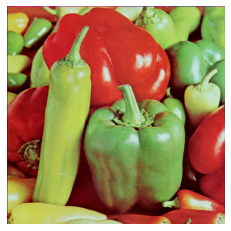

In [0]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import requests
from io import BytesIO

response = requests.get('https://homepages.cae.wisc.edu/~ece533/images/peppers.png')
img = Image.open(BytesIO(response.content)).convert()
plt.imshow(img)
plt.axis('off')
plt.show()

A imagem carregada é uma imagem "clássica" no estudo de processamento de imagem e computação gráfica. Temos a imagem colorida, com isto, podemos começar nossa avaliação.

## Atividade 01

Escreva/Implemente o código que plota a imagem em tons de cinza e o histograma da imagem em tons de cinza.

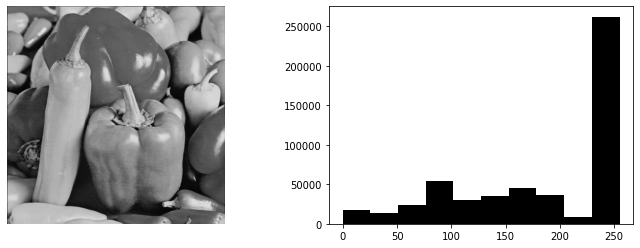

In [0]:
plt.figure(figsize=(12,4))
img_grey = img.convert('LA')
plt.subplot(121)
plt.axis('off')
plt.imshow(img_grey)

imagem_arr = np.array(img_grey)
plt.subplot(122)
plt.hist(imagem_arr.ravel(), color='black')
plt.show()


## Atividade 02

Escreva/Implemente o código que plota a imagem em preto e branco e o histograma da imagem em preto e branco.

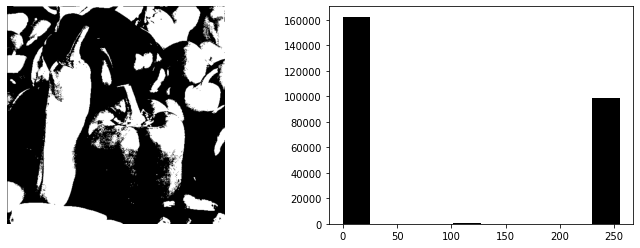

In [0]:
plt.figure(figsize=(12,4))
img_array = np.array(img)

img_array = np.mean(img_array, axis=2)
img_array[img_array > 127] = 255
img_array[img_array < 127] = 0 

img_pb = Image.fromarray(img_array)

plt.subplot(121)
plt.axis('off')
plt.imshow(img_pb)

plt.subplot(122)
plt.hist(img_array.ravel(), color='black')
plt.show()

## Atividade 03

Sobre os histogramas gerados nas atividade 1 e 2, o que podemos concluir? Responda no espaço abaixo.

> Visivelmente, a partir dos histogramas, é possível concluir que a imagem possui mais pontos claros que escuros. Até quando a imagem é apresentada com os dois extremos, 0 e 255, os pontos claros se destacam.

## Atividade 04

Gere duas imagens negativas, uma utilizando a imagem em preto e branco como base, e a outra a imagem em tons de cinza. Plote as imagem no final.

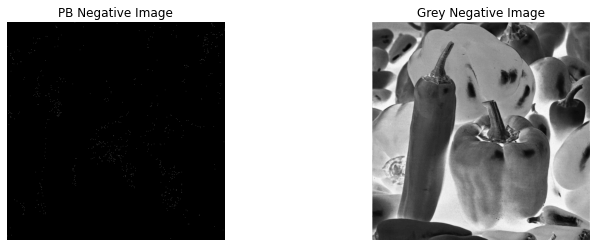

array([[-255., -255., -255., ..., -255.,    0., -255.],
       [-255., -255., -255., ...,    0.,    0.,    0.],
       [-255., -255., -255., ...,    0.,    0.,    0.],
       ...,
       [-255., -255., -255., ...,    0.,    0.,    0.],
       [-255., -255., -255., ...,    0.,    0.,    0.],
       [-255., -255., -255., ...,    0.,    0.,    0.]], dtype=float32)

In [188]:
plt.figure(figsize=(12,4))
img_pb_array = np.array(img_pb)
img_grey_array = np.array(img_grey)

img_pb_array[img_pb_array == 0] = - 255
img_pb_array[img_pb_array == 255] = 0 

img_pb_inv = Image.fromarray(img_pb_array)

plt.subplot(1,2,1)
plt.axis('off')
plt.title("PB Negative Image")
plt.imshow(img_pb_inv)

plt.subplot(1,2,2)
plt.axis('off')
plt.title("Grey Negative Image")
plt.imshow(inv_grey,cmap="gray")

plt.show()

## Atividade 05

Baseado nas imagens acima, o que você destaca?

> Não consegui plotar a imagem preta e branca, porém vou fazer uma análise em cima da teoria. Como uma imagem trabalha com extremos, basicamente aconteceria uma negativação de valores, onde 255 se tornaria 0 e 0 se tornaria -255.
Ja na imagem em tons de cinza, a negativação é um pouco mais esparça, sendo encontrados variantes entre os valores negativos

## Atividade 06

Escreva um código que plote o histograma das 3 cores (RGB) separadas.

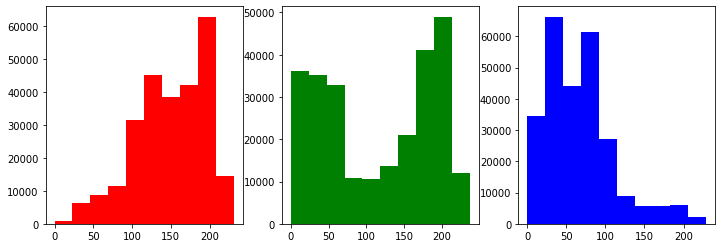

In [0]:
img_arr = np.array(img)

red = img_arr[:,:,0]
green = img_arr[:,:,1]
blue = img_arr[:,:,2]

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.hist(red.ravel(), color='red')

plt.subplot(132)
plt.hist(green.ravel(), color='green')

plt.subplot(133)
plt.hist(blue.ravel(), color='blue')

plt.show()

Baseado no histograma das 3 cores, escreva o que podemos concluir da imagem.

> A partir dos histogramas, percebe-se que a incidencia das cores verdes e vermelhas é um pouco mais incidente na imagem, sendo distribuídas um pouco mais uniformemente que a azul, que tem uma maior incidência no canto esquerdo, porém uma queda brusca no lado oposto da imagem.

## Atividade 07

Escreva um código que calcule a média dos pixels do canal azul, então, troque todos os valores do canal azul pela média e plote a nova imagem, em versão colorida.

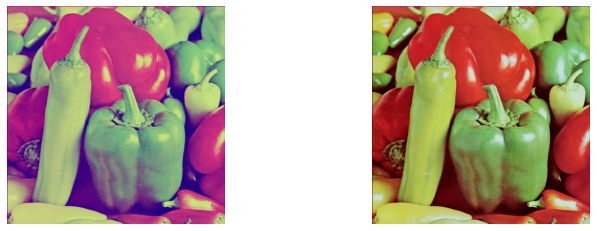

In [0]:
img_arr = np.array(img)

blue = img_arr[:,:,2]

soma = 0
for p in blue:
  soma = soma + p

media = np.sum(soma) / len(blue)

img_arr[:,:,2] = media

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.axis('off')
plt.imshow(img_arr)

plt.subplot(122)
plt.axis('off')
plt.imshow(img)
plt.show()

Explique como a imagem da questão 5 foi afetada?

> Nivelando todos os valores do canal azul pela média total do canal, tornou a imagem mais uniforme, basicamente aplicou um filtro na mesma, similar aos filtros que encontramos no instagram e em aplicativos de edição de fotos.